In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# write a two layer nn using numpy
N, D_in, H, D_out = 64, 1000, 100, 10

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

l = []
for epoch in range(500):
    
    # forward propagation, skip b1 and b2 for simplisity
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # compute loss
    loss = np.sum(np.square(y_pred - y))
    l.append(loss)
    
    # backpropagation
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0 # notice the backprop of relu, it is easy to make mistake
    grad_w1 = x.T.dot(grad_h)
    
    # update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

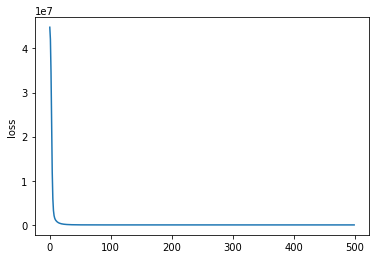

In [3]:
plt.plot(l)
plt.ylabel('loss')
plt.show()

In [4]:
# write a two layer nn using pytorch tensors (only slight modification of code above)
# write a two layer nn using numpy
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

learning_rate = 1e-6

l = []
for epoch in range(500):
    
    # forward propagation, skip b1 and b2 for simplisity
    h = x.mm(w1)  # .dot to mm
    h_relu = h.clamp(min=0) # .maximum to clamp
    y_pred = h_relu.mm(w2) 
    
    # compute loss
    loss = (y_pred - y).pow(2).sum().item() # .item() will convert 1D torch to number
    l.append(loss)
    
    # backpropagation
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred) # .T to .t()
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone() # .copy() to .clone()
    grad_h[h<0] = 0 # notice the backprop of relu, it is easy to make mistake
    grad_w1 = x.t().mm(grad_h)
    
    # update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

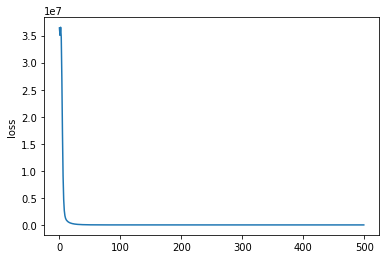

In [5]:
plt.plot(l)
plt.ylabel('loss')
plt.show()

In [6]:
# further modification of above code using autograd
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad = True) # with requires_grad = True, we can get the gradient of w1 through w1.grad
w2 = torch.randn(H, D_out, requires_grad = True) # by default a variable has requires_grad = False to save memory

learning_rate = 1e-6

l = []
for epoch in range(500):
    
    # forward propagation, skip b1 and b2 for simplisity
    h = x.mm(w1)  # .dot to mm
    h_relu = h.clamp(min=0) # .maximum to clamp
    y_pred = h_relu.mm(w2) 
    
    # compute loss
    loss = (y_pred - y).pow(2).sum()
    l.append(loss.item())
    
    # backpropagation
    loss.backward()
    
    # update weights
    with torch.no_grad(): # torch.no_grad() is required because PyTorch doesn’t allow in-place operations on leaf variables that have requires_grad=True. More detail: https://discuss.pytorch.org/t/leaf-variable-was-used-in-an-inplace-operation/308
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()  # this is important, if not reset the gradient, the gradient will accumulate in each epoch
        w2.grad.zero_()

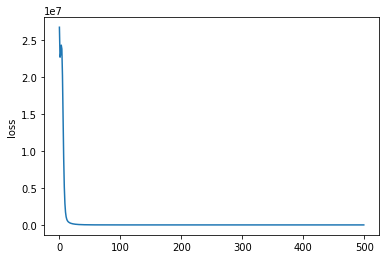

In [7]:
plt.plot(l)
plt.ylabel('loss')
plt.show()

In [8]:
# use torch.nn to further modify the above code
import torch.nn as nn
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

torch.nn.init.normal_(model[0].weight)  # manually init the weights of the first linear layer
torch.nn.init.normal_(model[2].weight)
l = []

loss_fn = nn.MSELoss(reduction = 'sum')
learning_rate = 1e-6

for epoch in range(500):
    
    # forward propagation
    y_pred = model(x)
    
    # compute loss
    loss = loss_fn(y_pred, y)
    l.append(loss.item())
    
    # backpropagation
    loss.backward()
    
    # update weights
    with torch.no_grad(): 
        for param in model.parameters(): # extract parameters of the model
            param -= learning_rate * param.grad
    
    model.zero_grad()

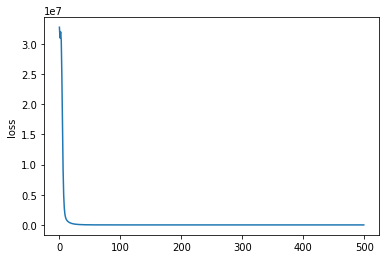

In [9]:
plt.plot(l)
plt.ylabel('loss')
plt.show()

In [10]:
# modify code above further to use optimizer in pytorch
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

torch.nn.init.normal_(model[0].weight)  # manually init the weights of the first linear layer
torch.nn.init.normal_(model[2].weight)
l = []

loss_fn = nn.MSELoss(reduction = 'sum')
learning_rate = 1e-6
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(500):
    
    # forward propagation
    y_pred = model(x)
    
    # compute loss
    loss = loss_fn(y_pred, y)
    l.append(loss.item())
    
    # backpropagation
    loss.backward()
    # update weights
    optimizer.step()
    
    optimizer.zero_grad() 

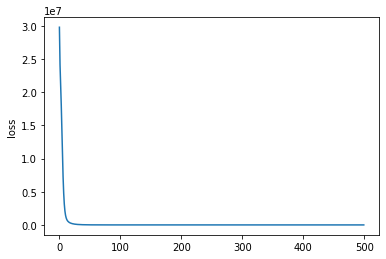

In [11]:
plt.plot(l)
plt.ylabel('loss')
plt.show()

In [12]:
# standard way to define model using nn.Module

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        # define each layer
        self.linear1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(H, D_out)
    
    def forward(self, x):
        y_pred = self.linear2(self.relu(self.linear1(x)))
        return y_pred

model = TwoLayerNet(D_in, H, D_out)
l = []

loss_fn = nn.MSELoss(reduction = 'sum')
learning_rate = 1e-4
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(500):
    
    # forward propagation
    y_pred = model(x)
    
    # compute loss
    loss = loss_fn(y_pred, y)
    l.append(loss.item())
    
    # backpropagation
    loss.backward()
    # update weights
    optimizer.step()
    
    optimizer.zero_grad() 

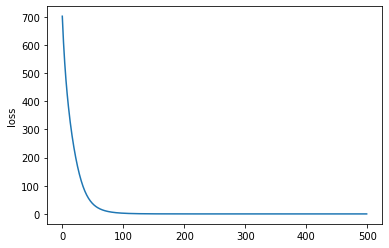

In [13]:
plt.plot(l)
plt.ylabel('loss')
plt.show()

In [14]:
# Play FizzBuzz using TwoLayer NN
# FizzBuzz: when an integer % 15 == 0, output 'fizzbuzz'
# when an integer % 3 == 0, output 'fizz'
# when an integer % 5 == 0, output 'buzz'

In [15]:
import numpy as np
import torch

In [16]:
NUM_DIGITS = 10

def binary_encode(i, num_digits):
    return np.array([i>>d & 1 for d in range(num_digits)][::-1])

def fizz_buzz_encode(i):
    if i % 15 == 0:
        return 3
    if i % 5 == 0:
        return 2
    if i % 3 == 0:
        return 1
    return 0

def fizz_buzz_decode(i, prediction):
    return [str(i), "fizz", "buzz", "fizzbuzz"][prediction]

In [17]:
binary_encode(3, 10)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [18]:
trX = torch.Tensor([binary_encode(i, NUM_DIGITS) for i in range(101, 2**NUM_DIGITS)])
trY = torch.LongTensor([fizz_buzz_encode(i) for i in range(101, 2**NUM_DIGITS)])

In [19]:
trX.shape

torch.Size([923, 10])

In [20]:
trY.shape

torch.Size([923])

In [21]:
# model architecture
NUM_HIDDEN = 100
model = torch.nn.Sequential(
    torch.nn.Linear(NUM_DIGITS, NUM_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(NUM_HIDDEN, 4)
)

# add GPU support in code
if torch.cuda.is_available():
    model = model.cuda()

In [22]:
loss_fn = torch.nn.CrossEntropyLoss() # notice that the input is of shape (N, C) and target is C only which mens input needs to be binary (possibly one-hot encoding) but target only needs to be an integer indicating the class. Also this loss does log softmax internally
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [23]:
BATCH_SIZE = 32
for epoch in range(10000):
    loss_avg = 0
    count = 0
    for start in range(0, trX.shape[0], BATCH_SIZE):
        end = start + BATCH_SIZE
        batchX = trX[start : end]
        batchY = trY[start : end]
        
        count += 1
        if torch.cuda.is_available():
            batchX = batchX.cuda()
            batchY = batchY.cuda()
        
        y_pred = model(batchX)
        loss = loss_fn(y_pred, batchY)
        loss_avg += loss.item()
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Epoch:', epoch, 'Loss:', loss_avg/count)
    

Epoch: 0 Loss: 1.4514521565930596
Epoch: 1 Loss: 1.4059328128551614
Epoch: 2 Loss: 1.3654671085291896
Epoch: 3 Loss: 1.3291945087498631
Epoch: 4 Loss: 1.2967122258811161
Epoch: 5 Loss: 1.2679200747917438
Epoch: 6 Loss: 1.2428667298678695
Epoch: 7 Loss: 1.2215472007619923
Epoch: 8 Loss: 1.2038578370521809
Epoch: 9 Loss: 1.189575113099197
Epoch: 10 Loss: 1.1783872267295574
Epoch: 11 Loss: 1.1698356168023472
Epoch: 12 Loss: 1.163432240486145
Epoch: 13 Loss: 1.1587132749886349
Epoch: 14 Loss: 1.1552675386954998
Epoch: 15 Loss: 1.1527638270937164
Epoch: 16 Loss: 1.1509310829228367
Epoch: 17 Loss: 1.1495628726893459
Epoch: 18 Loss: 1.1485192734619667
Epoch: 19 Loss: 1.1477014031903496
Epoch: 20 Loss: 1.1470416208793377
Epoch: 21 Loss: 1.1464882677999035
Epoch: 22 Loss: 1.1460101440035064
Epoch: 23 Loss: 1.1455842133226066
Epoch: 24 Loss: 1.1451977244738876
Epoch: 25 Loss: 1.1448429452961888
Epoch: 26 Loss: 1.1445119709804141
Epoch: 27 Loss: 1.1441996385311257
Epoch: 28 Loss: 1.14390568486575

Epoch: 239 Loss: 1.0898615943974461
Epoch: 240 Loss: 1.08946810919663
Epoch: 241 Loss: 1.0890569933529557
Epoch: 242 Loss: 1.0886669857748623
Epoch: 243 Loss: 1.0882672153670212
Epoch: 244 Loss: 1.0878729121438389
Epoch: 245 Loss: 1.0874894816299965
Epoch: 246 Loss: 1.0870646608286891
Epoch: 247 Loss: 1.0866708714386513
Epoch: 248 Loss: 1.086249199406854
Epoch: 249 Loss: 1.0858590890621316
Epoch: 250 Loss: 1.0854500367723663
Epoch: 251 Loss: 1.0850614884804035
Epoch: 252 Loss: 1.0846835827005321
Epoch: 253 Loss: 1.0842815226521985
Epoch: 254 Loss: 1.0838746654576268
Epoch: 255 Loss: 1.0834564874912131
Epoch: 256 Loss: 1.0830585627720273
Epoch: 257 Loss: 1.0826338324053535
Epoch: 258 Loss: 1.0822514131151397
Epoch: 259 Loss: 1.0818310030575455
Epoch: 260 Loss: 1.0814427384014786
Epoch: 261 Loss: 1.0810185218679493
Epoch: 262 Loss: 1.0806235732703373
Epoch: 263 Loss: 1.0802194948854118
Epoch: 264 Loss: 1.0797894740926808
Epoch: 265 Loss: 1.0793767016509483
Epoch: 266 Loss: 1.078949944726

Epoch: 475 Loss: 0.9732226153899883
Epoch: 476 Loss: 0.9727578676980118
Epoch: 477 Loss: 0.972122663053973
Epoch: 478 Loss: 0.9715560201940865
Epoch: 479 Loss: 0.9709895602587996
Epoch: 480 Loss: 0.970469711155727
Epoch: 481 Loss: 0.9698580462357094
Epoch: 482 Loss: 0.9692772750196785
Epoch: 483 Loss: 0.9687131663848614
Epoch: 484 Loss: 0.9681756332002837
Epoch: 485 Loss: 0.9675770771914515
Epoch: 486 Loss: 0.9670316474191074
Epoch: 487 Loss: 0.9664743522117878
Epoch: 488 Loss: 0.9658690300481073
Epoch: 489 Loss: 0.9652915021468853
Epoch: 490 Loss: 0.9647601370153756
Epoch: 491 Loss: 0.9641506918545427
Epoch: 492 Loss: 0.9636332927079037
Epoch: 493 Loss: 0.9630202877110449
Epoch: 494 Loss: 0.9624678985825901
Epoch: 495 Loss: 0.9618769431936329
Epoch: 496 Loss: 0.9613818916781195
Epoch: 497 Loss: 0.9608133661335913
Epoch: 498 Loss: 0.9602866933263582
Epoch: 499 Loss: 0.9596742083286417
Epoch: 500 Loss: 0.9590828891458183
Epoch: 501 Loss: 0.9584817721925932
Epoch: 502 Loss: 0.95794291742

Epoch: 714 Loss: 0.8370070169711935
Epoch: 715 Loss: 0.8363371450325539
Epoch: 716 Loss: 0.8357763537045183
Epoch: 717 Loss: 0.835222250428693
Epoch: 718 Loss: 0.8347189775828657
Epoch: 719 Loss: 0.8341804270086617
Epoch: 720 Loss: 0.8336304200106653
Epoch: 721 Loss: 0.8330272826655157
Epoch: 722 Loss: 0.8325727643637821
Epoch: 723 Loss: 0.8320915246831959
Epoch: 724 Loss: 0.831553276242881
Epoch: 725 Loss: 0.8309753454964737
Epoch: 726 Loss: 0.8304823410922083
Epoch: 727 Loss: 0.8300212703902146
Epoch: 728 Loss: 0.8294140675972248
Epoch: 729 Loss: 0.8288594422669247
Epoch: 730 Loss: 0.8282916669187874
Epoch: 731 Loss: 0.8277702475416249
Epoch: 732 Loss: 0.8272912440628841
Epoch: 733 Loss: 0.8267615684147539
Epoch: 734 Loss: 0.8262267441585146
Epoch: 735 Loss: 0.8256656876925764
Epoch: 736 Loss: 0.8251409797832884
Epoch: 737 Loss: 0.8246309572252734
Epoch: 738 Loss: 0.8240999682196255
Epoch: 739 Loss: 0.8236327890692086
Epoch: 740 Loss: 0.8231072076435747
Epoch: 741 Loss: 0.82248250574

Epoch: 943 Loss: 0.7231236059090187
Epoch: 944 Loss: 0.722742682900922
Epoch: 945 Loss: 0.7222056347748329
Epoch: 946 Loss: 0.7217696596836222
Epoch: 947 Loss: 0.7213287189089018
Epoch: 948 Loss: 0.7208825432021042
Epoch: 949 Loss: 0.7203935097003805
Epoch: 950 Loss: 0.7198939158998686
Epoch: 951 Loss: 0.7194138724228432
Epoch: 952 Loss: 0.7188189954593264
Epoch: 953 Loss: 0.7183567162217765
Epoch: 954 Loss: 0.7178452754842823
Epoch: 955 Loss: 0.7173952912462169
Epoch: 956 Loss: 0.7169526363241261
Epoch: 957 Loss: 0.7164654690643837
Epoch: 958 Loss: 0.7160233916907475
Epoch: 959 Loss: 0.7155522087524677
Epoch: 960 Loss: 0.7149907165560229
Epoch: 961 Loss: 0.7144544494563135
Epoch: 962 Loss: 0.7140172904935377
Epoch: 963 Loss: 0.7135628955117588
Epoch: 964 Loss: 0.7131632196492163
Epoch: 965 Loss: 0.712668396275619
Epoch: 966 Loss: 0.7120768098995603
Epoch: 967 Loss: 0.7115919014503216
Epoch: 968 Loss: 0.711131346636805
Epoch: 969 Loss: 0.7106131582424559
Epoch: 970 Loss: 0.710043658470

Epoch: 1169 Loss: 0.6200768392661522
Epoch: 1170 Loss: 0.6195982304112665
Epoch: 1171 Loss: 0.6191882059491914
Epoch: 1172 Loss: 0.6187533952038864
Epoch: 1173 Loss: 0.6184040801278476
Epoch: 1174 Loss: 0.6180194688254389
Epoch: 1175 Loss: 0.6175120760654581
Epoch: 1176 Loss: 0.6170877516269684
Epoch: 1177 Loss: 0.6166698377707909
Epoch: 1178 Loss: 0.6162077260428461
Epoch: 1179 Loss: 0.6158520599891399
Epoch: 1180 Loss: 0.6154522988302954
Epoch: 1181 Loss: 0.6148998614015251
Epoch: 1182 Loss: 0.6145766058872486
Epoch: 1183 Loss: 0.6141332840097362
Epoch: 1184 Loss: 0.6137646303094667
Epoch: 1185 Loss: 0.6132461921922092
Epoch: 1186 Loss: 0.612873958102588
Epoch: 1187 Loss: 0.6124306351974093
Epoch: 1188 Loss: 0.6119892268345274
Epoch: 1189 Loss: 0.6116100159184686
Epoch: 1190 Loss: 0.61113005362708
Epoch: 1191 Loss: 0.6107344945956921
Epoch: 1192 Loss: 0.61036259860828
Epoch: 1193 Loss: 0.6099765013004171
Epoch: 1194 Loss: 0.6095829112776394
Epoch: 1195 Loss: 0.6091403950904978
Epoch:

Epoch: 1401 Loss: 0.5313573274119147
Epoch: 1402 Loss: 0.5309474714871111
Epoch: 1403 Loss: 0.530622561430109
Epoch: 1404 Loss: 0.5302593358631792
Epoch: 1405 Loss: 0.5299861667485073
Epoch: 1406 Loss: 0.5296141864924595
Epoch: 1407 Loss: 0.5292163306269152
Epoch: 1408 Loss: 0.5289124908118412
Epoch: 1409 Loss: 0.5285657921741749
Epoch: 1410 Loss: 0.5282737931300854
Epoch: 1411 Loss: 0.5278699490530737
Epoch: 1412 Loss: 0.527553169891752
Epoch: 1413 Loss: 0.52716166089321
Epoch: 1414 Loss: 0.5267396702848631
Epoch: 1415 Loss: 0.5263463279296612
Epoch: 1416 Loss: 0.5260017205928934
Epoch: 1417 Loss: 0.5257117840750464
Epoch: 1418 Loss: 0.5253548324108124
Epoch: 1419 Loss: 0.525105986101874
Epoch: 1420 Loss: 0.5246924079697708
Epoch: 1421 Loss: 0.524343668386854
Epoch: 1422 Loss: 0.5239392858127068
Epoch: 1423 Loss: 0.523593676501307
Epoch: 1424 Loss: 0.5233135439198593
Epoch: 1425 Loss: 0.5229371960820823
Epoch: 1426 Loss: 0.522645325496279
Epoch: 1427 Loss: 0.5222968726322569
Epoch: 14

Epoch: 1631 Loss: 0.45506409118915425
Epoch: 1632 Loss: 0.45476769681634577
Epoch: 1633 Loss: 0.45432836845003327
Epoch: 1634 Loss: 0.4540057521441887
Epoch: 1635 Loss: 0.4536553816548709
Epoch: 1636 Loss: 0.4533452710201
Epoch: 1637 Loss: 0.45307489921306743
Epoch: 1638 Loss: 0.45277983361277085
Epoch: 1639 Loss: 0.4525062832339057
Epoch: 1640 Loss: 0.45223540375972615
Epoch: 1641 Loss: 0.4519428240841833
Epoch: 1642 Loss: 0.4515627149877877
Epoch: 1643 Loss: 0.45121332591977614
Epoch: 1644 Loss: 0.45093535246520206
Epoch: 1645 Loss: 0.45062366025201206
Epoch: 1646 Loss: 0.4503253698348999
Epoch: 1647 Loss: 0.4501802633548605
Epoch: 1648 Loss: 0.4498105521859794
Epoch: 1649 Loss: 0.4494394742209336
Epoch: 1650 Loss: 0.4491375232564992
Epoch: 1651 Loss: 0.44885970806253367
Epoch: 1652 Loss: 0.44854765205547725
Epoch: 1653 Loss: 0.44818324364464857
Epoch: 1654 Loss: 0.4478891348016673
Epoch: 1655 Loss: 0.44755784704767426
Epoch: 1656 Loss: 0.44730947757589407
Epoch: 1657 Loss: 0.4470534

Epoch: 1862 Loss: 0.3896252482101835
Epoch: 1863 Loss: 0.38945212240876825
Epoch: 1864 Loss: 0.3892382989669668
Epoch: 1865 Loss: 0.3889408861768657
Epoch: 1866 Loss: 0.38854655006836203
Epoch: 1867 Loss: 0.3882961232086708
Epoch: 1868 Loss: 0.3881679506137453
Epoch: 1869 Loss: 0.3879031980859822
Epoch: 1870 Loss: 0.38762379411993353
Epoch: 1871 Loss: 0.3873020862710887
Epoch: 1872 Loss: 0.38712791841605615
Epoch: 1873 Loss: 0.3867663648621789
Epoch: 1874 Loss: 0.38651780629980154
Epoch: 1875 Loss: 0.38621183304951107
Epoch: 1876 Loss: 0.38609707663799153
Epoch: 1877 Loss: 0.3858890523170603
Epoch: 1878 Loss: 0.3855895348663988
Epoch: 1879 Loss: 0.38534262776374817
Epoch: 1880 Loss: 0.3850545400175555
Epoch: 1881 Loss: 0.3847795868742055
Epoch: 1882 Loss: 0.38458434774957856
Epoch: 1883 Loss: 0.38428463606998836
Epoch: 1884 Loss: 0.3839928209781647
Epoch: 1885 Loss: 0.38373660321893366
Epoch: 1886 Loss: 0.3834859934346429
Epoch: 1887 Loss: 0.38324926433892087
Epoch: 1888 Loss: 0.382963

Epoch: 2084 Loss: 0.3349271468047438
Epoch: 2085 Loss: 0.3346097839289698
Epoch: 2086 Loss: 0.33437695225764963
Epoch: 2087 Loss: 0.3341891349389635
Epoch: 2088 Loss: 0.33389605581760406
Epoch: 2089 Loss: 0.3336215825944111
Epoch: 2090 Loss: 0.3333809668647832
Epoch: 2091 Loss: 0.3331861763164915
Epoch: 2092 Loss: 0.3329718719268667
Epoch: 2093 Loss: 0.33269772652922003
Epoch: 2094 Loss: 0.33237024936182746
Epoch: 2095 Loss: 0.33209103243104343
Epoch: 2096 Loss: 0.33184600955453414
Epoch: 2097 Loss: 0.33162407165971297
Epoch: 2098 Loss: 0.33141326801530246
Epoch: 2099 Loss: 0.3311168294528435
Epoch: 2100 Loss: 0.33086322145215397
Epoch: 2101 Loss: 0.3306471284093528
Epoch: 2102 Loss: 0.33038584117231695
Epoch: 2103 Loss: 0.33013970225021755
Epoch: 2104 Loss: 0.3298688484676953
Epoch: 2105 Loss: 0.3296121698001335
Epoch: 2106 Loss: 0.32940036212575846
Epoch: 2107 Loss: 0.3291291435217035
Epoch: 2108 Loss: 0.32883496171441573
Epoch: 2109 Loss: 0.3285746281516963
Epoch: 2110 Loss: 0.32833

Epoch: 2309 Loss: 0.2848609208033003
Epoch: 2310 Loss: 0.28464908743726797
Epoch: 2311 Loss: 0.28454031718188316
Epoch: 2312 Loss: 0.2842985401893484
Epoch: 2313 Loss: 0.2840708766517968
Epoch: 2314 Loss: 0.28381925615771064
Epoch: 2315 Loss: 0.2836057307391331
Epoch: 2316 Loss: 0.2834947844003809
Epoch: 2317 Loss: 0.2833036677590732
Epoch: 2318 Loss: 0.28314694710846605
Epoch: 2319 Loss: 0.28291549250997344
Epoch: 2320 Loss: 0.2826773452347723
Epoch: 2321 Loss: 0.28251288420167464
Epoch: 2322 Loss: 0.2822514561743572
Epoch: 2323 Loss: 0.2820490932670133
Epoch: 2324 Loss: 0.281831507538927
Epoch: 2325 Loss: 0.2816286652252592
Epoch: 2326 Loss: 0.28141940770478086
Epoch: 2327 Loss: 0.2812632260651424
Epoch: 2328 Loss: 0.28103687845427416
Epoch: 2329 Loss: 0.2808261251655118
Epoch: 2330 Loss: 0.28058973468583204
Epoch: 2331 Loss: 0.2804435620020176
Epoch: 2332 Loss: 0.2802368489832714
Epoch: 2333 Loss: 0.28005775192688254
Epoch: 2334 Loss: 0.27985325661198845
Epoch: 2335 Loss: 0.27966526

Epoch: 2534 Loss: 0.24312124272872662
Epoch: 2535 Loss: 0.242962921487874
Epoch: 2536 Loss: 0.24280583652956733
Epoch: 2537 Loss: 0.2426573932170868
Epoch: 2538 Loss: 0.2424932528158714
Epoch: 2539 Loss: 0.2423240963754983
Epoch: 2540 Loss: 0.24210021824672304
Epoch: 2541 Loss: 0.24194559660451165
Epoch: 2542 Loss: 0.2417753328537119
Epoch: 2543 Loss: 0.2416178928367023
Epoch: 2544 Loss: 0.24146232317233907
Epoch: 2545 Loss: 0.24129989126632953
Epoch: 2546 Loss: 0.24109641488256126
Epoch: 2547 Loss: 0.2409337342813097
Epoch: 2548 Loss: 0.24077824785791593
Epoch: 2549 Loss: 0.24062972644279743
Epoch: 2550 Loss: 0.24046170865667277
Epoch: 2551 Loss: 0.2403570613984404
Epoch: 2552 Loss: 0.2401666589852037
Epoch: 2553 Loss: 0.24000984635846367
Epoch: 2554 Loss: 0.2397818940466848
Epoch: 2555 Loss: 0.2396289218088676
Epoch: 2556 Loss: 0.23947109744466585
Epoch: 2557 Loss: 0.23936043114497743
Epoch: 2558 Loss: 0.2391649479496068
Epoch: 2559 Loss: 0.23903384547809076
Epoch: 2560 Loss: 0.23889

Epoch: 2756 Loss: 0.20840709476635375
Epoch: 2757 Loss: 0.20824608566432162
Epoch: 2758 Loss: 0.20817384123802185
Epoch: 2759 Loss: 0.20802797325726213
Epoch: 2760 Loss: 0.20789287830221242
Epoch: 2761 Loss: 0.20770949125289917
Epoch: 2762 Loss: 0.2075786153817999
Epoch: 2763 Loss: 0.20740260235194502
Epoch: 2764 Loss: 0.20727298331671748
Epoch: 2765 Loss: 0.20713769567423854
Epoch: 2766 Loss: 0.20702186329611416
Epoch: 2767 Loss: 0.20687308753358907
Epoch: 2768 Loss: 0.20668845598039956
Epoch: 2769 Loss: 0.20656348507979821
Epoch: 2770 Loss: 0.20645777059012446
Epoch: 2771 Loss: 0.2063301919863142
Epoch: 2772 Loss: 0.20608068334645238
Epoch: 2773 Loss: 0.2059306178627343
Epoch: 2774 Loss: 0.2058180606570737
Epoch: 2775 Loss: 0.20573382593434433
Epoch: 2776 Loss: 0.2055675726512383
Epoch: 2777 Loss: 0.2054392119933819
Epoch: 2778 Loss: 0.20527656119445276
Epoch: 2779 Loss: 0.2051460244532289
Epoch: 2780 Loss: 0.2049949117775621
Epoch: 2781 Loss: 0.20487100656690269
Epoch: 2782 Loss: 0.

Epoch: 2978 Loss: 0.17902094896497397
Epoch: 2979 Loss: 0.17889731274596576
Epoch: 2980 Loss: 0.17880095181794003
Epoch: 2981 Loss: 0.1786603498561629
Epoch: 2982 Loss: 0.17854189153375297
Epoch: 2983 Loss: 0.17843348687065058
Epoch: 2984 Loss: 0.17836545125163836
Epoch: 2985 Loss: 0.17821100431269613
Epoch: 2986 Loss: 0.17805296747848906
Epoch: 2987 Loss: 0.17789716247854562
Epoch: 2988 Loss: 0.17776074697231425
Epoch: 2989 Loss: 0.17763021639708815
Epoch: 2990 Loss: 0.1775745302438736
Epoch: 2991 Loss: 0.17747922267379432
Epoch: 2992 Loss: 0.1773390854740965
Epoch: 2993 Loss: 0.17716653927646833
Epoch: 2994 Loss: 0.17706707813616457
Epoch: 2995 Loss: 0.17693166588914805
Epoch: 2996 Loss: 0.1768485896032432
Epoch: 2997 Loss: 0.17670563017499857
Epoch: 2998 Loss: 0.17659220536207332
Epoch: 2999 Loss: 0.176477808633755
Epoch: 3000 Loss: 0.17637145981706423
Epoch: 3001 Loss: 0.17622953293652371
Epoch: 3002 Loss: 0.17610295784884486
Epoch: 3003 Loss: 0.17594721271046276
Epoch: 3004 Loss: 

Epoch: 3202 Loss: 0.15379129324493737
Epoch: 3203 Loss: 0.15368220261458693
Epoch: 3204 Loss: 0.15357039663298377
Epoch: 3205 Loss: 0.153472227012289
Epoch: 3206 Loss: 0.15339896442561313
Epoch: 3207 Loss: 0.15328286305583758
Epoch: 3208 Loss: 0.15317772560078521
Epoch: 3209 Loss: 0.15305304116216198
Epoch: 3210 Loss: 0.1529704607252417
Epoch: 3211 Loss: 0.15286375556526513
Epoch: 3212 Loss: 0.152790742444581
Epoch: 3213 Loss: 0.1526614188634116
Epoch: 3214 Loss: 0.15254203666900767
Epoch: 3215 Loss: 0.15240617738715534
Epoch: 3216 Loss: 0.15235797110302696
Epoch: 3217 Loss: 0.15225396048406076
Epoch: 3218 Loss: 0.15215412270406198
Epoch: 3219 Loss: 0.15203201719399156
Epoch: 3220 Loss: 0.15197331278488554
Epoch: 3221 Loss: 0.15184154464253063
Epoch: 3222 Loss: 0.15170691701872596
Epoch: 3223 Loss: 0.15162382197791133
Epoch: 3224 Loss: 0.15158019625935062
Epoch: 3225 Loss: 0.15148052444745755
Epoch: 3226 Loss: 0.15132570600715176
Epoch: 3227 Loss: 0.1512103663950131
Epoch: 3228 Loss: 0

Epoch: 3423 Loss: 0.13295870993671746
Epoch: 3424 Loss: 0.13285448119558138
Epoch: 3425 Loss: 0.13277903379037462
Epoch: 3426 Loss: 0.132710138785428
Epoch: 3427 Loss: 0.13262599603883152
Epoch: 3428 Loss: 0.13256023926981564
Epoch: 3429 Loss: 0.1324611321605485
Epoch: 3430 Loss: 0.1323813608494298
Epoch: 3431 Loss: 0.13226061776794237
Epoch: 3432 Loss: 0.13221409737036147
Epoch: 3433 Loss: 0.1321209753895628
Epoch: 3434 Loss: 0.13202621864861455
Epoch: 3435 Loss: 0.13192895928333545
Epoch: 3436 Loss: 0.13183583704562024
Epoch: 3437 Loss: 0.131792097513018
Epoch: 3438 Loss: 0.13170118116099258
Epoch: 3439 Loss: 0.13163230388328948
Epoch: 3440 Loss: 0.13151430646921025
Epoch: 3441 Loss: 0.13140500876410255
Epoch: 3442 Loss: 0.1313325878361176
Epoch: 3443 Loss: 0.13127592539992824
Epoch: 3444 Loss: 0.13117289106393681
Epoch: 3445 Loss: 0.13106463566936297
Epoch: 3446 Loss: 0.13098716067856755
Epoch: 3447 Loss: 0.13091643000471181
Epoch: 3448 Loss: 0.13085543004603223
Epoch: 3449 Loss: 0.

Epoch: 3645 Loss: 0.11520215457883375
Epoch: 3646 Loss: 0.11513693168245513
Epoch: 3647 Loss: 0.11504478392929866
Epoch: 3648 Loss: 0.11500300723930885
Epoch: 3649 Loss: 0.11496194683272264
Epoch: 3650 Loss: 0.11487356907334821
Epoch: 3651 Loss: 0.11476773665896778
Epoch: 3652 Loss: 0.11469434227409034
Epoch: 3653 Loss: 0.1146095950027992
Epoch: 3654 Loss: 0.11453663146701352
Epoch: 3655 Loss: 0.11448769708131921
Epoch: 3656 Loss: 0.11439619547334211
Epoch: 3657 Loss: 0.11433079427686231
Epoch: 3658 Loss: 0.11426886607860696
Epoch: 3659 Loss: 0.11418185383081436
Epoch: 3660 Loss: 0.11409159749746323
Epoch: 3661 Loss: 0.11403333241569585
Epoch: 3662 Loss: 0.11395683884620667
Epoch: 3663 Loss: 0.11388515912253282
Epoch: 3664 Loss: 0.11382840702245975
Epoch: 3665 Loss: 0.11373112915918746
Epoch: 3666 Loss: 0.11366607274474769
Epoch: 3667 Loss: 0.11360783078547182
Epoch: 3668 Loss: 0.11351828148652768
Epoch: 3669 Loss: 0.11346840190476384
Epoch: 3670 Loss: 0.1133865937590599
Epoch: 3671 Lo

Epoch: 3868 Loss: 0.10021707711034808
Epoch: 3869 Loss: 0.10013191414804294
Epoch: 3870 Loss: 0.10008041714799815
Epoch: 3871 Loss: 0.1000210356352658
Epoch: 3872 Loss: 0.09996810876603784
Epoch: 3873 Loss: 0.09990031747468586
Epoch: 3874 Loss: 0.09982862117989309
Epoch: 3875 Loss: 0.09975567061839433
Epoch: 3876 Loss: 0.09969436929657541
Epoch: 3877 Loss: 0.09961351623822903
Epoch: 3878 Loss: 0.09956647404308977
Epoch: 3879 Loss: 0.09949809377049577
Epoch: 3880 Loss: 0.09943246250522547
Epoch: 3881 Loss: 0.09937978651503036
Epoch: 3882 Loss: 0.09936108234627493
Epoch: 3883 Loss: 0.09928176346524008
Epoch: 3884 Loss: 0.09918332613747695
Epoch: 3885 Loss: 0.09914941019539175
Epoch: 3886 Loss: 0.09910010482216704
Epoch: 3887 Loss: 0.09903423115611076
Epoch: 3888 Loss: 0.09896868197568531
Epoch: 3889 Loss: 0.09889864523349137
Epoch: 3890 Loss: 0.09885439816220053
Epoch: 3891 Loss: 0.09880034985213444
Epoch: 3892 Loss: 0.09873141040062082
Epoch: 3893 Loss: 0.09866215468480669
Epoch: 3894 L

Epoch: 4089 Loss: 0.08750372803930578
Epoch: 4090 Loss: 0.08745746391600576
Epoch: 4091 Loss: 0.08741250788343363
Epoch: 4092 Loss: 0.08736914280673554
Epoch: 4093 Loss: 0.08730682036999998
Epoch: 4094 Loss: 0.0872595315349513
Epoch: 4095 Loss: 0.08719833773271791
Epoch: 4096 Loss: 0.08712989400173056
Epoch: 4097 Loss: 0.08709298639461913
Epoch: 4098 Loss: 0.08704636014741042
Epoch: 4099 Loss: 0.08699338767549088
Epoch: 4100 Loss: 0.08691450735104495
Epoch: 4101 Loss: 0.08684448165626361
Epoch: 4102 Loss: 0.08681553884826858
Epoch: 4103 Loss: 0.0867800269404362
Epoch: 4104 Loss: 0.08671240213102308
Epoch: 4105 Loss: 0.08664403264892512
Epoch: 4106 Loss: 0.08661043772409702
Epoch: 4107 Loss: 0.0865694292146584
Epoch: 4108 Loss: 0.08650470948938666
Epoch: 4109 Loss: 0.08644361537078331
Epoch: 4110 Loss: 0.08640731871128082
Epoch: 4111 Loss: 0.08634254182207174
Epoch: 4112 Loss: 0.08629955132973605
Epoch: 4113 Loss: 0.08621905654154975
Epoch: 4114 Loss: 0.08618626319642725
Epoch: 4115 Los

Epoch: 4314 Loss: 0.07652817332539065
Epoch: 4315 Loss: 0.0764779962342361
Epoch: 4316 Loss: 0.07643619346721418
Epoch: 4317 Loss: 0.07638153703562145
Epoch: 4318 Loss: 0.07633309400287168
Epoch: 4319 Loss: 0.07631446292688107
Epoch: 4320 Loss: 0.07626397329671629
Epoch: 4321 Loss: 0.07619367963795004
Epoch: 4322 Loss: 0.07613790292164375
Epoch: 4323 Loss: 0.076129625069684
Epoch: 4324 Loss: 0.07607746227034207
Epoch: 4325 Loss: 0.07602955670706157
Epoch: 4326 Loss: 0.07601059086877725
Epoch: 4327 Loss: 0.0759614165230044
Epoch: 4328 Loss: 0.07591100512393589
Epoch: 4329 Loss: 0.07585425957523544
Epoch: 4330 Loss: 0.0758061845754755
Epoch: 4331 Loss: 0.07576975020869024
Epoch: 4332 Loss: 0.07573151614131599
Epoch: 4333 Loss: 0.07567109745638124
Epoch: 4334 Loss: 0.07562871932469566
Epoch: 4335 Loss: 0.07557989168783714
Epoch: 4336 Loss: 0.07555513790455358
Epoch: 4337 Loss: 0.07550046592950821
Epoch: 4338 Loss: 0.07544540459739751
Epoch: 4339 Loss: 0.07540788180355368
Epoch: 4340 Loss:

Epoch: 4543 Loss: 0.06716924957160292
Epoch: 4544 Loss: 0.06713168888256468
Epoch: 4545 Loss: 0.06711827758057363
Epoch: 4546 Loss: 0.06705762638614096
Epoch: 4547 Loss: 0.06702157289817415
Epoch: 4548 Loss: 0.06697792302945564
Epoch: 4549 Loss: 0.06693747292818694
Epoch: 4550 Loss: 0.06689317742812223
Epoch: 4551 Loss: 0.06688110748755521
Epoch: 4552 Loss: 0.06684044234711549
Epoch: 4553 Loss: 0.06679739661771676
Epoch: 4554 Loss: 0.06673966874850207
Epoch: 4555 Loss: 0.0667120491893127
Epoch: 4556 Loss: 0.06669197218685315
Epoch: 4557 Loss: 0.06665519419415243
Epoch: 4558 Loss: 0.06661324318626831
Epoch: 4559 Loss: 0.06656311221163848
Epoch: 4560 Loss: 0.0665196077576999
Epoch: 4561 Loss: 0.06647338820942517
Epoch: 4562 Loss: 0.06647484518330672
Epoch: 4563 Loss: 0.06642007981908732
Epoch: 4564 Loss: 0.06637730089754894
Epoch: 4565 Loss: 0.0663438946779432
Epoch: 4566 Loss: 0.06631114809163685
Epoch: 4567 Loss: 0.06627587036326013
Epoch: 4568 Loss: 0.0662246336197031
Epoch: 4569 Loss

Epoch: 4764 Loss: 0.05932462221846498
Epoch: 4765 Loss: 0.05929321095604321
Epoch: 4766 Loss: 0.05927275885538808
Epoch: 4767 Loss: 0.05924617454152683
Epoch: 4768 Loss: 0.05920284530469056
Epoch: 4769 Loss: 0.05916606641278185
Epoch: 4770 Loss: 0.05913515793609208
Epoch: 4771 Loss: 0.0591039953689123
Epoch: 4772 Loss: 0.05905926362450781
Epoch: 4773 Loss: 0.05903266505177679
Epoch: 4774 Loss: 0.05899908868917104
Epoch: 4775 Loss: 0.058960462245961714
Epoch: 4776 Loss: 0.058924738125040614
Epoch: 4777 Loss: 0.05888862316978389
Epoch: 4778 Loss: 0.058869068221799256
Epoch: 4779 Loss: 0.058855088556121135
Epoch: 4780 Loss: 0.058807315561791945
Epoch: 4781 Loss: 0.05875061047745162
Epoch: 4782 Loss: 0.0587350327264646
Epoch: 4783 Loss: 0.05868986094820088
Epoch: 4784 Loss: 0.058677772188494945
Epoch: 4785 Loss: 0.058632739145180274
Epoch: 4786 Loss: 0.05859520935035985
Epoch: 4787 Loss: 0.05855977548093631
Epoch: 4788 Loss: 0.05852793208483992
Epoch: 4789 Loss: 0.058496184069021
Epoch: 47

Epoch: 4991 Loss: 0.052272464951564526
Epoch: 4992 Loss: 0.0522382269003268
Epoch: 4993 Loss: 0.05221331344339354
Epoch: 4994 Loss: 0.05217043053487252
Epoch: 4995 Loss: 0.05213903513704908
Epoch: 4996 Loss: 0.052108288646258154
Epoch: 4997 Loss: 0.05209913213962111
Epoch: 4998 Loss: 0.05208386660649859
Epoch: 4999 Loss: 0.052037634533540954
Epoch: 5000 Loss: 0.05200699864533441
Epoch: 5001 Loss: 0.0519673496741673
Epoch: 5002 Loss: 0.05193266272544861
Epoch: 5003 Loss: 0.05191427430716054
Epoch: 5004 Loss: 0.05188513399455054
Epoch: 5005 Loss: 0.05184111448711362
Epoch: 5006 Loss: 0.05181742934831258
Epoch: 5007 Loss: 0.051804490130523156
Epoch: 5008 Loss: 0.05178019031882286
Epoch: 5009 Loss: 0.051731761159568
Epoch: 5010 Loss: 0.05171695544288076
Epoch: 5011 Loss: 0.05167487841741792
Epoch: 5012 Loss: 0.05165220835599406
Epoch: 5013 Loss: 0.0516174803006238
Epoch: 5014 Loss: 0.05158730621995597
Epoch: 5015 Loss: 0.05156817524854479
Epoch: 5016 Loss: 0.05153576361721959
Epoch: 5017 L

Epoch: 5218 Loss: 0.04601037772051219
Epoch: 5219 Loss: 0.04598012412416524
Epoch: 5220 Loss: 0.0459579325698573
Epoch: 5221 Loss: 0.04592539652668197
Epoch: 5222 Loss: 0.04590940719534611
Epoch: 5223 Loss: 0.045869796761664854
Epoch: 5224 Loss: 0.04584854218209612
Epoch: 5225 Loss: 0.045825207349041414
Epoch: 5226 Loss: 0.0457910414913605
Epoch: 5227 Loss: 0.04577486191330285
Epoch: 5228 Loss: 0.04574096491881486
Epoch: 5229 Loss: 0.04571871074109242
Epoch: 5230 Loss: 0.04570390451057204
Epoch: 5231 Loss: 0.04568720891557891
Epoch: 5232 Loss: 0.04565535061832132
Epoch: 5233 Loss: 0.04560600734990219
Epoch: 5234 Loss: 0.04558380526201478
Epoch: 5235 Loss: 0.0455706036681759
Epoch: 5236 Loss: 0.0455353335830672
Epoch: 5237 Loss: 0.04550855947208816
Epoch: 5238 Loss: 0.04551160650263573
Epoch: 5239 Loss: 0.04548533633351326
Epoch: 5240 Loss: 0.04544558119157265
Epoch: 5241 Loss: 0.045408411079953456
Epoch: 5242 Loss: 0.04539508269778613
Epoch: 5243 Loss: 0.04539084492315506
Epoch: 5244 L

Epoch: 5446 Loss: 0.04041425170826501
Epoch: 5447 Loss: 0.040387619415233875
Epoch: 5448 Loss: 0.04035958140317736
Epoch: 5449 Loss: 0.04033529276734796
Epoch: 5450 Loss: 0.04031565926712135
Epoch: 5451 Loss: 0.04031361067860291
Epoch: 5452 Loss: 0.0402782257517864
Epoch: 5453 Loss: 0.04025558632766378
Epoch: 5454 Loss: 0.04022752801919806
Epoch: 5455 Loss: 0.04019995920103172
Epoch: 5456 Loss: 0.04017951660628977
Epoch: 5457 Loss: 0.040153463082066895
Epoch: 5458 Loss: 0.04014261420173892
Epoch: 5459 Loss: 0.04012465894479176
Epoch: 5460 Loss: 0.04009262697193129
Epoch: 5461 Loss: 0.040065588108424484
Epoch: 5462 Loss: 0.040042644880455114
Epoch: 5463 Loss: 0.04001471445221325
Epoch: 5464 Loss: 0.039988410434332385
Epoch: 5465 Loss: 0.03996826393594002
Epoch: 5466 Loss: 0.039938740560720706
Epoch: 5467 Loss: 0.039934508438254225
Epoch: 5468 Loss: 0.03989630494395207
Epoch: 5469 Loss: 0.039883533749600936
Epoch: 5470 Loss: 0.03986283455943239
Epoch: 5471 Loss: 0.03982977710407356
Epoch

Epoch: 5666 Loss: 0.03563264744548962
Epoch: 5667 Loss: 0.0356119345745136
Epoch: 5668 Loss: 0.03559599097432761
Epoch: 5669 Loss: 0.03556142843745906
Epoch: 5670 Loss: 0.03553953098839727
Epoch: 5671 Loss: 0.0355300893685941
Epoch: 5672 Loss: 0.035510726529976416
Epoch: 5673 Loss: 0.03548713266078768
Epoch: 5674 Loss: 0.03546640264063046
Epoch: 5675 Loss: 0.035458278039406085
Epoch: 5676 Loss: 0.03542835528737512
Epoch: 5677 Loss: 0.03541754468761642
Epoch: 5678 Loss: 0.035392130885658596
Epoch: 5679 Loss: 0.035373641434928466
Epoch: 5680 Loss: 0.03535556716137919
Epoch: 5681 Loss: 0.035322348683558664
Epoch: 5682 Loss: 0.03530739446909263
Epoch: 5683 Loss: 0.03528919693981779
Epoch: 5684 Loss: 0.03527342084923695
Epoch: 5685 Loss: 0.03525135454175801
Epoch: 5686 Loss: 0.03522891602639494
Epoch: 5687 Loss: 0.03520564015569358
Epoch: 5688 Loss: 0.0351852340431049
Epoch: 5689 Loss: 0.03517369168071911
Epoch: 5690 Loss: 0.035153711792723884
Epoch: 5691 Loss: 0.03511930873681759
Epoch: 56

Epoch: 5893 Loss: 0.0313790300861001
Epoch: 5894 Loss: 0.03134453421908206
Epoch: 5895 Loss: 0.0313232133229231
Epoch: 5896 Loss: 0.03131198834884783
Epoch: 5897 Loss: 0.031301574877880774
Epoch: 5898 Loss: 0.03127688159844998
Epoch: 5899 Loss: 0.031249518377770638
Epoch: 5900 Loss: 0.03124050654727837
Epoch: 5901 Loss: 0.031240053057413678
Epoch: 5902 Loss: 0.03120927769562294
Epoch: 5903 Loss: 0.031186521984636784
Epoch: 5904 Loss: 0.031162578227191137
Epoch: 5905 Loss: 0.031152723549768842
Epoch: 5906 Loss: 0.031140328641852427
Epoch: 5907 Loss: 0.0311268982638059
Epoch: 5908 Loss: 0.031105001039546113
Epoch: 5909 Loss: 0.03109226070729823
Epoch: 5910 Loss: 0.031060020182410192
Epoch: 5911 Loss: 0.03104614604521414
Epoch: 5912 Loss: 0.031042153465336765
Epoch: 5913 Loss: 0.03101052523686968
Epoch: 5914 Loss: 0.031008971822929794
Epoch: 5915 Loss: 0.030980190711802448
Epoch: 5916 Loss: 0.030957105601656026
Epoch: 5917 Loss: 0.03094521566326248
Epoch: 5918 Loss: 0.03093301703960731
Ep

Epoch: 6108 Loss: 0.027804741796491474
Epoch: 6109 Loss: 0.02779504383817829
Epoch: 6110 Loss: 0.027787808071950387
Epoch: 6111 Loss: 0.027760149878931457
Epoch: 6112 Loss: 0.027736774260370897
Epoch: 6113 Loss: 0.02773314637356791
Epoch: 6114 Loss: 0.027715842368016982
Epoch: 6115 Loss: 0.027708379551768303
Epoch: 6116 Loss: 0.027694390444406147
Epoch: 6117 Loss: 0.02767056608893748
Epoch: 6118 Loss: 0.027647366393999808
Epoch: 6119 Loss: 0.02764166172208457
Epoch: 6120 Loss: 0.027624468190659737
Epoch: 6121 Loss: 0.027602433516033763
Epoch: 6122 Loss: 0.02759320626099562
Epoch: 6123 Loss: 0.027579912658909272
Epoch: 6124 Loss: 0.02755770456559699
Epoch: 6125 Loss: 0.027549544381427354
Epoch: 6126 Loss: 0.02752436947976721
Epoch: 6127 Loss: 0.02750730193380652
Epoch: 6128 Loss: 0.027495238095008093
Epoch: 6129 Loss: 0.027490638774530642
Epoch: 6130 Loss: 0.027468882918614764
Epoch: 6131 Loss: 0.027449779019787394
Epoch: 6132 Loss: 0.027437080083222223
Epoch: 6133 Loss: 0.0274178901173

Epoch: 6335 Loss: 0.024476460213291234
Epoch: 6336 Loss: 0.02447126426830374
Epoch: 6337 Loss: 0.024459509178996086
Epoch: 6338 Loss: 0.024442941143081105
Epoch: 6339 Loss: 0.024423384107649326
Epoch: 6340 Loss: 0.02441376714228556
Epoch: 6341 Loss: 0.024412037965295643
Epoch: 6342 Loss: 0.0243891309304484
Epoch: 6343 Loss: 0.02436946303551567
Epoch: 6344 Loss: 0.024358699451489694
Epoch: 6345 Loss: 0.024343508327829427
Epoch: 6346 Loss: 0.024328869414226763
Epoch: 6347 Loss: 0.024325287900865078
Epoch: 6348 Loss: 0.024309769208575117
Epoch: 6349 Loss: 0.02428754158960334
Epoch: 6350 Loss: 0.0242673823096115
Epoch: 6351 Loss: 0.02426463728449468
Epoch: 6352 Loss: 0.024260713397685825
Epoch: 6353 Loss: 0.02423779441621797
Epoch: 6354 Loss: 0.024223071201865017
Epoch: 6355 Loss: 0.024205187817328964
Epoch: 6356 Loss: 0.0241904074069241
Epoch: 6357 Loss: 0.02417873758180388
Epoch: 6358 Loss: 0.024171721639818157
Epoch: 6359 Loss: 0.02415141087539237
Epoch: 6360 Loss: 0.024140657857060432


Epoch: 6560 Loss: 0.021344379489791804
Epoch: 6561 Loss: 0.021321129214403958
Epoch: 6562 Loss: 0.021313693213822513
Epoch: 6563 Loss: 0.021309728220362086
Epoch: 6564 Loss: 0.021299450401345205
Epoch: 6565 Loss: 0.02128784287849377
Epoch: 6566 Loss: 0.021276163708033233
Epoch: 6567 Loss: 0.021254305310290437
Epoch: 6568 Loss: 0.021246146828193088
Epoch: 6569 Loss: 0.02123001156824416
Epoch: 6570 Loss: 0.021213894998975868
Epoch: 6571 Loss: 0.021195583687774067
Epoch: 6572 Loss: 0.021186155845122092
Epoch: 6573 Loss: 0.021170385053445553
Epoch: 6574 Loss: 0.021165441336302923
Epoch: 6575 Loss: 0.021148432142518717
Epoch: 6576 Loss: 0.021140926228515034
Epoch: 6577 Loss: 0.021126285933985793
Epoch: 6578 Loss: 0.021107378544221664
Epoch: 6579 Loss: 0.021091008012921644
Epoch: 6580 Loss: 0.02108659694806255
Epoch: 6581 Loss: 0.021073302575226487
Epoch: 6582 Loss: 0.02105224996419816
Epoch: 6583 Loss: 0.021040476633813875
Epoch: 6584 Loss: 0.02103277010008179
Epoch: 6585 Loss: 0.0210163727

Epoch: 6783 Loss: 0.01851698292162398
Epoch: 6784 Loss: 0.0185048735604204
Epoch: 6785 Loss: 0.018484784274137224
Epoch: 6786 Loss: 0.018474098744577373
Epoch: 6787 Loss: 0.018468700702591188
Epoch: 6788 Loss: 0.018459086242164004
Epoch: 6789 Loss: 0.018443527968664622
Epoch: 6790 Loss: 0.01843032887976231
Epoch: 6791 Loss: 0.018420248950735248
Epoch: 6792 Loss: 0.01840559182817052
Epoch: 6793 Loss: 0.018396254243521856
Epoch: 6794 Loss: 0.018384361029442013
Epoch: 6795 Loss: 0.01837059444394605
Epoch: 6796 Loss: 0.018366321182713426
Epoch: 6797 Loss: 0.018344091877726645
Epoch: 6798 Loss: 0.018326447441660124
Epoch: 6799 Loss: 0.018327067044146102
Epoch: 6800 Loss: 0.018311782145936942
Epoch: 6801 Loss: 0.018302258393117065
Epoch: 6802 Loss: 0.018284497027895575
Epoch: 6803 Loss: 0.01827657145672831
Epoch: 6804 Loss: 0.018260886346728636
Epoch: 6805 Loss: 0.01824898845997864
Epoch: 6806 Loss: 0.018240292139094453
Epoch: 6807 Loss: 0.018229447594233627
Epoch: 6808 Loss: 0.0182130189837

Epoch: 7006 Loss: 0.015991536482911687
Epoch: 7007 Loss: 0.015981739868634735
Epoch: 7008 Loss: 0.015964223055875505
Epoch: 7009 Loss: 0.01595362757557425
Epoch: 7010 Loss: 0.01594687042886327
Epoch: 7011 Loss: 0.015935540118993355
Epoch: 7012 Loss: 0.015919714234769344
Epoch: 7013 Loss: 0.01591075971272999
Epoch: 7014 Loss: 0.015901461709290743
Epoch: 7015 Loss: 0.015891624967856652
Epoch: 7016 Loss: 0.015887394595634322
Epoch: 7017 Loss: 0.015874243967620463
Epoch: 7018 Loss: 0.01586223249163093
Epoch: 7019 Loss: 0.015846858716345037
Epoch: 7020 Loss: 0.015838548043293172
Epoch: 7021 Loss: 0.015831304826484673
Epoch: 7022 Loss: 0.015817090130314744
Epoch: 7023 Loss: 0.015806386648709404
Epoch: 7024 Loss: 0.015795519430961073
Epoch: 7025 Loss: 0.01579406221622023
Epoch: 7026 Loss: 0.01577960139397403
Epoch: 7027 Loss: 0.01576384622603655
Epoch: 7028 Loss: 0.015749637053572928
Epoch: 7029 Loss: 0.015745301730930805
Epoch: 7030 Loss: 0.015735978389094615
Epoch: 7031 Loss: 0.015729037354

Epoch: 7229 Loss: 0.01374368029164857
Epoch: 7230 Loss: 0.013737414289137414
Epoch: 7231 Loss: 0.013726315782244864
Epoch: 7232 Loss: 0.013715360506341374
Epoch: 7233 Loss: 0.01370872825319911
Epoch: 7234 Loss: 0.013698178905479867
Epoch: 7235 Loss: 0.013689152543143979
Epoch: 7236 Loss: 0.013679842657313264
Epoch: 7237 Loss: 0.013667626547273892
Epoch: 7238 Loss: 0.013659276164554316
Epoch: 7239 Loss: 0.013650013776174906
Epoch: 7240 Loss: 0.013641505710909078
Epoch: 7241 Loss: 0.013631289327067548
Epoch: 7242 Loss: 0.013622144510134541
Epoch: 7243 Loss: 0.01361519520588476
Epoch: 7244 Loss: 0.013601868044071156
Epoch: 7245 Loss: 0.013593816342924175
Epoch: 7246 Loss: 0.013588403431891367
Epoch: 7247 Loss: 0.013574774023787728
Epoch: 7248 Loss: 0.013565323219217103
Epoch: 7249 Loss: 0.013559866696596146
Epoch: 7250 Loss: 0.013549306783182868
Epoch: 7251 Loss: 0.013539049934981198
Epoch: 7252 Loss: 0.01352787308459138
Epoch: 7253 Loss: 0.013517193078737834
Epoch: 7254 Loss: 0.013507386

Epoch: 7453 Loss: 0.011790667756878096
Epoch: 7454 Loss: 0.011782428554805189
Epoch: 7455 Loss: 0.011775944205322143
Epoch: 7456 Loss: 0.011771693311888596
Epoch: 7457 Loss: 0.011761281518907896
Epoch: 7458 Loss: 0.011751431040465832
Epoch: 7459 Loss: 0.01174169560444766
Epoch: 7460 Loss: 0.011742298692015225
Epoch: 7461 Loss: 0.011729830980365133
Epoch: 7462 Loss: 0.011723205872715033
Epoch: 7463 Loss: 0.011710853789579766
Epoch: 7464 Loss: 0.011701490336643725
Epoch: 7465 Loss: 0.011692145566359675
Epoch: 7466 Loss: 0.011689720851979378
Epoch: 7467 Loss: 0.011684786568492138
Epoch: 7468 Loss: 0.011672672558704326
Epoch: 7469 Loss: 0.011663762049685264
Epoch: 7470 Loss: 0.01165229719581789
Epoch: 7471 Loss: 0.011646769435048616
Epoch: 7472 Loss: 0.011640835031545881
Epoch: 7473 Loss: 0.01163644924888323
Epoch: 7474 Loss: 0.011626193323975494
Epoch: 7475 Loss: 0.011615415681795827
Epoch: 7476 Loss: 0.011606237786854136
Epoch: 7477 Loss: 0.011603560033736044
Epoch: 7478 Loss: 0.01159207

Epoch: 7676 Loss: 0.010129619181027701
Epoch: 7677 Loss: 0.010125452459886157
Epoch: 7678 Loss: 0.010122553742458594
Epoch: 7679 Loss: 0.010108134580840325
Epoch: 7680 Loss: 0.010098381361378164
Epoch: 7681 Loss: 0.010092680470953727
Epoch: 7682 Loss: 0.010093170442971689
Epoch: 7683 Loss: 0.0100858129705463
Epoch: 7684 Loss: 0.010073970786520633
Epoch: 7685 Loss: 0.010063402571490613
Epoch: 7686 Loss: 0.010062637803112638
Epoch: 7687 Loss: 0.01005710930370822
Epoch: 7688 Loss: 0.010048409458249807
Epoch: 7689 Loss: 0.01003939628697418
Epoch: 7690 Loss: 0.010029455791388092
Epoch: 7691 Loss: 0.010024656453330455
Epoch: 7692 Loss: 0.010021293158482375
Epoch: 7693 Loss: 0.010012100362379489
Epoch: 7694 Loss: 0.010009248186994729
Epoch: 7695 Loss: 0.01000054924074432
Epoch: 7696 Loss: 0.009990344618864614
Epoch: 7697 Loss: 0.009984176244650936
Epoch: 7698 Loss: 0.009983795438090274
Epoch: 7699 Loss: 0.00997257202960037
Epoch: 7700 Loss: 0.009963708913660255
Epoch: 7701 Loss: 0.00995749428

Epoch: 7900 Loss: 0.008671215430287451
Epoch: 7901 Loss: 0.008666228109585315
Epoch: 7902 Loss: 0.00865990157913545
Epoch: 7903 Loss: 0.008655956312050593
Epoch: 7904 Loss: 0.00864376525137702
Epoch: 7905 Loss: 0.008642221158691522
Epoch: 7906 Loss: 0.008643343691425076
Epoch: 7907 Loss: 0.008630025746493504
Epoch: 7908 Loss: 0.008625568444680038
Epoch: 7909 Loss: 0.008619903072971722
Epoch: 7910 Loss: 0.008614598725248
Epoch: 7911 Loss: 0.008611793509395472
Epoch: 7912 Loss: 0.008601817824267622
Epoch: 7913 Loss: 0.008593232868688887
Epoch: 7914 Loss: 0.00859177990110013
Epoch: 7915 Loss: 0.008586330355369839
Epoch: 7916 Loss: 0.008577550632943368
Epoch: 7917 Loss: 0.008571808138091502
Epoch: 7918 Loss: 0.008563702484464338
Epoch: 7919 Loss: 0.00855683281632333
Epoch: 7920 Loss: 0.008552187869068363
Epoch: 7921 Loss: 0.008553826908484614
Epoch: 7922 Loss: 0.00854075491299917
Epoch: 7923 Loss: 0.008533498079612338
Epoch: 7924 Loss: 0.008533185765404126
Epoch: 7925 Loss: 0.0085261204151

Epoch: 8122 Loss: 0.0074441417136454375
Epoch: 8123 Loss: 0.007438996734482975
Epoch: 8124 Loss: 0.007435098434958993
Epoch: 8125 Loss: 0.0074320934343569236
Epoch: 8126 Loss: 0.007421359757025694
Epoch: 8127 Loss: 0.007413745239569709
Epoch: 8128 Loss: 0.007411561962538238
Epoch: 8129 Loss: 0.0074084335456377475
Epoch: 8130 Loss: 0.007402062119016874
Epoch: 8131 Loss: 0.007398247526123606
Epoch: 8132 Loss: 0.00739133561126374
Epoch: 8133 Loss: 0.007386777726612215
Epoch: 8134 Loss: 0.007381872643299144
Epoch: 8135 Loss: 0.007374995628949897
Epoch: 8136 Loss: 0.007366978153907533
Epoch: 8137 Loss: 0.007366642219431955
Epoch: 8138 Loss: 0.007366837315454051
Epoch: 8139 Loss: 0.007356772512390182
Epoch: 8140 Loss: 0.007348750525250517
Epoch: 8141 Loss: 0.007343556996884531
Epoch: 8142 Loss: 0.007338462477742598
Epoch: 8143 Loss: 0.007334908117251149
Epoch: 8144 Loss: 0.007332337739202997
Epoch: 8145 Loss: 0.007326429942622781
Epoch: 8146 Loss: 0.007318550102605388
Epoch: 8147 Loss: 0.007

Epoch: 8341 Loss: 0.006392711291796175
Epoch: 8342 Loss: 0.006387453229198682
Epoch: 8343 Loss: 0.006380396405363391
Epoch: 8344 Loss: 0.006377125038476339
Epoch: 8345 Loss: 0.006370947503581129
Epoch: 8346 Loss: 0.006369301527417426
Epoch: 8347 Loss: 0.006363965627127166
Epoch: 8348 Loss: 0.006360495254268934
Epoch: 8349 Loss: 0.006356632537690216
Epoch: 8350 Loss: 0.006351191751209313
Epoch: 8351 Loss: 0.006342504984410158
Epoch: 8352 Loss: 0.006341811711097072
Epoch: 8353 Loss: 0.006338114802051207
Epoch: 8354 Loss: 0.006335627215368481
Epoch: 8355 Loss: 0.0063306799736516225
Epoch: 8356 Loss: 0.006326202929405303
Epoch: 8357 Loss: 0.006319801074227896
Epoch: 8358 Loss: 0.006316642598088445
Epoch: 8359 Loss: 0.0063117928642394214
Epoch: 8360 Loss: 0.006308369338512421
Epoch: 8361 Loss: 0.0063028856148493705
Epoch: 8362 Loss: 0.006296477762275729
Epoch: 8363 Loss: 0.006292588808092064
Epoch: 8364 Loss: 0.006289343494151173
Epoch: 8365 Loss: 0.006288136407765078
Epoch: 8366 Loss: 0.00

Epoch: 8558 Loss: 0.005487795573948273
Epoch: 8559 Loss: 0.005487229960071373
Epoch: 8560 Loss: 0.005485941643890892
Epoch: 8561 Loss: 0.005478614913139107
Epoch: 8562 Loss: 0.005470124065297945
Epoch: 8563 Loss: 0.005469178825070889
Epoch: 8564 Loss: 0.005469492941709428
Epoch: 8565 Loss: 0.005463293588977179
Epoch: 8566 Loss: 0.005458937436021094
Epoch: 8567 Loss: 0.005454172295967823
Epoch: 8568 Loss: 0.005451794966637832
Epoch: 8569 Loss: 0.005448601333071189
Epoch: 8570 Loss: 0.005444544776952986
Epoch: 8571 Loss: 0.005440650756695661
Epoch: 8572 Loss: 0.005434785796939556
Epoch: 8573 Loss: 0.0054326921837918206
Epoch: 8574 Loss: 0.005429592168215534
Epoch: 8575 Loss: 0.005423354944374798
Epoch: 8576 Loss: 0.005420605896907891
Epoch: 8577 Loss: 0.005418509004059537
Epoch: 8578 Loss: 0.00541306281028765
Epoch: 8579 Loss: 0.005410694573395725
Epoch: 8580 Loss: 0.005405853000662193
Epoch: 8581 Loss: 0.005402994293976447
Epoch: 8582 Loss: 0.005398033672526222
Epoch: 8583 Loss: 0.00539

Epoch: 8782 Loss: 0.004687570982837471
Epoch: 8783 Loss: 0.004687637568387235
Epoch: 8784 Loss: 0.0046846006820299504
Epoch: 8785 Loss: 0.004677294480518021
Epoch: 8786 Loss: 0.0046742559402603015
Epoch: 8787 Loss: 0.004672737876435035
Epoch: 8788 Loss: 0.004667554159070654
Epoch: 8789 Loss: 0.0046672832325165125
Epoch: 8790 Loss: 0.004662323454073791
Epoch: 8791 Loss: 0.004657879503893441
Epoch: 8792 Loss: 0.0046560763911312
Epoch: 8793 Loss: 0.0046540340368539605
Epoch: 8794 Loss: 0.004650175178038149
Epoch: 8795 Loss: 0.0046452981106744244
Epoch: 8796 Loss: 0.004639749198445472
Epoch: 8797 Loss: 0.004636953299833012
Epoch: 8798 Loss: 0.004634473011186668
Epoch: 8799 Loss: 0.004633072884111055
Epoch: 8800 Loss: 0.004629122394394001
Epoch: 8801 Loss: 0.004625860392918874
Epoch: 8802 Loss: 0.004621280594086596
Epoch: 8803 Loss: 0.004619012245555119
Epoch: 8804 Loss: 0.0046157566148081215
Epoch: 8805 Loss: 0.004610613719078487
Epoch: 8806 Loss: 0.004609527788927843
Epoch: 8807 Loss: 0.0

Epoch: 9006 Loss: 0.00399211332892421
Epoch: 9007 Loss: 0.003988267307908371
Epoch: 9008 Loss: 0.003988167062273313
Epoch: 9009 Loss: 0.003983914229922511
Epoch: 9010 Loss: 0.003980727139699818
Epoch: 9011 Loss: 0.003978234575258504
Epoch: 9012 Loss: 0.003975108783724236
Epoch: 9013 Loss: 0.003970423693254847
Epoch: 9014 Loss: 0.0039677772438153625
Epoch: 9015 Loss: 0.00396765379941669
Epoch: 9016 Loss: 0.003963709929315695
Epoch: 9017 Loss: 0.003960658952690147
Epoch: 9018 Loss: 0.003958360641263425
Epoch: 9019 Loss: 0.00395344822378508
Epoch: 9020 Loss: 0.003952664186664182
Epoch: 9021 Loss: 0.003950767913544229
Epoch: 9022 Loss: 0.003947476442935395
Epoch: 9023 Loss: 0.003941632185034968
Epoch: 9024 Loss: 0.003940006095819689
Epoch: 9025 Loss: 0.00394027952731041
Epoch: 9026 Loss: 0.003936125110064088
Epoch: 9027 Loss: 0.003930568466252038
Epoch: 9028 Loss: 0.003928390737012799
Epoch: 9029 Loss: 0.003926729088938185
Epoch: 9030 Loss: 0.003923498190425593
Epoch: 9031 Loss: 0.00392561

Epoch: 9229 Loss: 0.0033949431280830295
Epoch: 9230 Loss: 0.0033923916775604776
Epoch: 9231 Loss: 0.003391103445680748
Epoch: 9232 Loss: 0.00338684419844428
Epoch: 9233 Loss: 0.0033856399180688733
Epoch: 9234 Loss: 0.0033845545900664455
Epoch: 9235 Loss: 0.003383656112669871
Epoch: 9236 Loss: 0.0033782725061835914
Epoch: 9237 Loss: 0.003375550302484169
Epoch: 9238 Loss: 0.0033734335307160327
Epoch: 9239 Loss: 0.0033698703226601257
Epoch: 9240 Loss: 0.0033691955674118525
Epoch: 9241 Loss: 0.0033649653959055914
Epoch: 9242 Loss: 0.0033633464401395157
Epoch: 9243 Loss: 0.0033624091041113795
Epoch: 9244 Loss: 0.003358663866649671
Epoch: 9245 Loss: 0.0033569478405767986
Epoch: 9246 Loss: 0.0033554294114482813
Epoch: 9247 Loss: 0.0033500962970971033
Epoch: 9248 Loss: 0.0033484364514528163
Epoch: 9249 Loss: 0.0033466864842921495
Epoch: 9250 Loss: 0.0033450899966831864
Epoch: 9251 Loss: 0.003341768603322321
Epoch: 9252 Loss: 0.0033397312348323136
Epoch: 9253 Loss: 0.0033372290721484297
Epoch: 

Epoch: 9439 Loss: 0.002916807358972086
Epoch: 9440 Loss: 0.0029142023112367966
Epoch: 9441 Loss: 0.0029135261991478758
Epoch: 9442 Loss: 0.0029103883144702635
Epoch: 9443 Loss: 0.0029075755476791025
Epoch: 9444 Loss: 0.002905772679790469
Epoch: 9445 Loss: 0.0029043473146759488
Epoch: 9446 Loss: 0.0029023074813925758
Epoch: 9447 Loss: 0.0028990693490727453
Epoch: 9448 Loss: 0.0028966761792303414
Epoch: 9449 Loss: 0.002896540161976912
Epoch: 9450 Loss: 0.0028934043205889135
Epoch: 9451 Loss: 0.0028897300242157332
Epoch: 9452 Loss: 0.002889327492147427
Epoch: 9453 Loss: 0.0028874718499819524
Epoch: 9454 Loss: 0.0028841789342173986
Epoch: 9455 Loss: 0.0028838977249788828
Epoch: 9456 Loss: 0.0028820435600836985
Epoch: 9457 Loss: 0.0028779630083590746
Epoch: 9458 Loss: 0.002874031129036227
Epoch: 9459 Loss: 0.0028727708247907715
Epoch: 9460 Loss: 0.002874100928050305
Epoch: 9461 Loss: 0.002870569469262685
Epoch: 9462 Loss: 0.0028682698632172985
Epoch: 9463 Loss: 0.002865901698583159
Epoch: 9

Epoch: 9647 Loss: 0.0025064229668150173
Epoch: 9648 Loss: 0.002504827733681505
Epoch: 9649 Loss: 0.002502558475906222
Epoch: 9650 Loss: 0.002501704304575406
Epoch: 9651 Loss: 0.0024992929900000834
Epoch: 9652 Loss: 0.0024984903826281942
Epoch: 9653 Loss: 0.0024957421681329863
Epoch: 9654 Loss: 0.0024924080915235238
Epoch: 9655 Loss: 0.0024916831592643827
Epoch: 9656 Loss: 0.0024915961207468704
Epoch: 9657 Loss: 0.0024890836091423086
Epoch: 9658 Loss: 0.0024858694844718636
Epoch: 9659 Loss: 0.0024827002138220543
Epoch: 9660 Loss: 0.0024818934355701865
Epoch: 9661 Loss: 0.0024806937275069028
Epoch: 9662 Loss: 0.002479469184844016
Epoch: 9663 Loss: 0.0024779289258354954
Epoch: 9664 Loss: 0.002475584343332669
Epoch: 9665 Loss: 0.0024730815383573546
Epoch: 9666 Loss: 0.002470999643013909
Epoch: 9667 Loss: 0.00246922047367191
Epoch: 9668 Loss: 0.002469374007416953
Epoch: 9669 Loss: 0.0024653385806796624
Epoch: 9670 Loss: 0.002464153085321445
Epoch: 9671 Loss: 0.00246210626109728
Epoch: 9672 

Epoch: 9855 Loss: 0.0021495366537269077
Epoch: 9856 Loss: 0.002147677729853654
Epoch: 9857 Loss: 0.002146924663222684
Epoch: 9858 Loss: 0.0021437548245463907
Epoch: 9859 Loss: 0.0021418146628501087
Epoch: 9860 Loss: 0.002141233365019334
Epoch: 9861 Loss: 0.0021396652626772894
Epoch: 9862 Loss: 0.0021387890366644695
Epoch: 9863 Loss: 0.00213615571004178
Epoch: 9864 Loss: 0.002134231059683551
Epoch: 9865 Loss: 0.002133259314899172
Epoch: 9866 Loss: 0.002131784678003269
Epoch: 9867 Loss: 0.0021296515880184696
Epoch: 9868 Loss: 0.002128534988452006
Epoch: 9869 Loss: 0.002126068683694406
Epoch: 9870 Loss: 0.0021259195857745565
Epoch: 9871 Loss: 0.0021241799093269067
Epoch: 9872 Loss: 0.002122388070786436
Epoch: 9873 Loss: 0.002119863072635028
Epoch: 9874 Loss: 0.0021172498055765853
Epoch: 9875 Loss: 0.0021171133146332256
Epoch: 9876 Loss: 0.0021161682048716165
Epoch: 9877 Loss: 0.002114512568243362
Epoch: 9878 Loss: 0.0021128464381788567
Epoch: 9879 Loss: 0.0021107974381924704
Epoch: 9880 L

In [24]:
# test
testX = torch.Tensor([binary_encode(i, NUM_DIGITS) for i in range(1, 101)])
testY = torch.LongTensor([fizz_buzz_encode(i) for i in range(1, 101)])

if torch.cuda.is_available():
    testX = testX.cuda()
    
with torch.no_grad():
    testYPredict = model(testX)

In [25]:
testYPredict.shape

torch.Size([100, 4])

In [26]:
# test is of shape (100, 4), need to pick the index of the maximum value to be the prediction(argmax)
testYPredict = testYPredict.max(axis=1)[1].data.tolist() # [1] selects the index (argmax) [0] will select the value
print([fizz_buzz_decode(i, x) for (i,x) in zip(range(1, 101), testYPredict)])

['1', '2', 'fizz', 'buzz', 'buzz', 'fizz', '7', '8', 'fizz', 'buzz', '11', 'fizz', '13', '14', 'fizzbuzz', '16', 'fizz', 'fizz', 'fizz', 'buzz', 'fizz', '22', '23', 'fizz', 'buzz', '26', 'fizz', '28', '29', 'fizzbuzz', '31', 'fizz', 'fizz', 'fizz', 'buzz', 'fizz', '37', '38', 'fizz', 'buzz', '41', 'fizz', '43', '44', '45', '46', '47', 'fizz', 'fizz', 'buzz', 'fizz', '52', '53', 'fizz', 'buzz', '56', 'fizz', '58', '59', 'fizzbuzz', '61', '62', 'fizz', '64', 'buzz', 'fizz', 'fizz', 'buzz', 'buzz', 'buzz', '71', 'fizz', '73', '74', 'fizzbuzz', 'buzz', '77', 'fizz', '79', 'buzz', 'fizz', '82', '83', 'fizz', 'buzz', '86', 'fizz', '88', '89', 'fizzbuzz', '91', 'fizz', 'fizz', '94', 'buzz', 'fizz', '97', '98', 'fizz', 'buzz']


In [27]:
accuracy = (np.sum(testY.numpy() == np.array(testYPredict))) / 100

In [28]:
print(accuracy)

0.88


In [29]:
print(testY.numpy() == np.array(testYPredict))

[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True]
